In [1]:
# importing packages
import pandas #
import numpy
import matplotlib.pyplot as plt
from scipy import stats
from typing import Iterable

In [2]:
# defines the dataframe as "df" to allow easier access later
df = pandas.read_csv("slr.csv")

In [3]:
# generates statistical summary of the proportions of non-white people 
# and high school graduates within the sample of SF census blocks
df.describe()[["NonWhite", "Education"]]

,NonWhite,Education
count,60.000000,60.000000
mean,0.589638,0.857605
std,0.204536,0.109820
min,0.128998,0.539999
25%,0.481250,0.804000
50%,0.569000,0.888000
75%,0.742500,0.937197
max,0.981262,1.000996


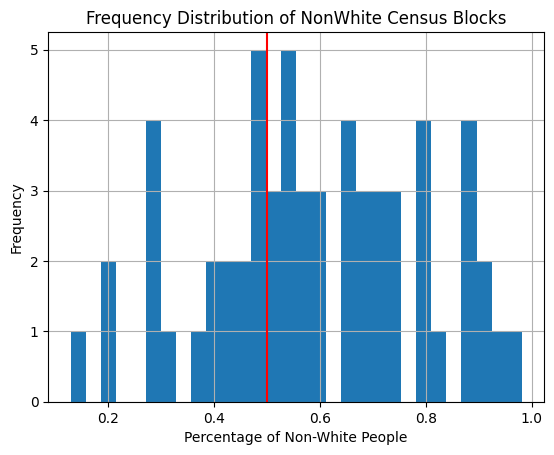

In [4]:
# creates a frequency distribution of non-white proportion across the sample census blocks
df.hist(column="NonWhite", bins=30)
plt.axvline(0.5, color = "r") # draws the line between white-majority blocks (> 50% white) and white-minority blocks (<50%)
plt.title("Frequency Distribution of NonWhite Census Blocks")
plt.savefig("Frequency Distribution of Non-White Census Blocks", dpi = 600)
plt.xlabel("Percentage of Non-White People")
plt.ylabel("Frequency")
plt.show()

In [5]:
white = df[df["NonWhite"] < 0.5]
non_white = df[df["NonWhite"] >= 0.5]

# H0: mean(education in white) == mean(education in non_white)
# H1: mean(education in white) > mean(education in non_white)

In [1]:
bins = 15
w_range = max(white["Education"]) - min(white["Education"])
nw_range = max(non_white["Education"]) - min(non_white["Education"])
max_range = max(w_range, nw_range)
space_per_bin = max_range / bins
w_bins = int(w_range / space_per_bin)
nw_bins = int(nw_range / space_per_bin)

plt.hist(non_white["Education"], edgecolor = "white", color = "blue", label = "Non-White Majority", alpha = 0.7, bins = nw_bins)
plt.hist(white["Education"], edgecolor = "white", color = "green", label = "White Majority", alpha = 0.7, bins = w_bins)
plt.xlabel("Percentage of Adults over age 25 with High School Diplomas")
plt.ylabel("Frequency")
plt.title("Proportion of High School Graduates Across Census Blocks of Varying Racial Diversity")
plt.legend()
plt.show()

NameError: name 'white' is not defined

In [7]:
def difference_of_means_test(
    control: Iterable[float], treatment: Iterable[float], tails: int = 1
):
    n_1, n_2 = len(control), len(treatment)
    x_1, x_2 = numpy.mean(control), numpy.mean(treatment)

    # sample SD formula (aka Bessel’s correction): use n-1 in denominator
    s_1, s_2 = numpy.std(control, ddof=1), numpy.std(
        treatment, ddof=1
    )

    # conservative estimate from OpenIntro
    DOF = min(n_1, n_2) - 1

    SE = numpy.sqrt(s_1**2 / n_1 + s_2**2 / n_2)
    t_score = numpy.abs((x_2 - x_1)) / SE
    p_value = tails * stats.t.cdf(-t_score, DOF)

    # OpenIntro section 5.3.6
    pooled_SD = numpy.sqrt(
        (s_1**2 * (n_1 - 1) + s_2**2 * (n_2 - 1)) / (n_1 + n_2 - 2)
    )
    cohen_d = (x_2 - x_1) / pooled_SD

    return p_value, cohen_d


In [10]:
p_value, cohen_d = difference_of_means_test(
    white["Education"], non_white["Education"], tails=1
)
print("p-value:", p_value, "Cohen's d:", cohen_d)


p-value: 7.741754705428446e-07 Cohen's d: -1.4538461053727096
